# Análisis de archivos pruebas saber pro 

Con los archivos de las pruebas del saber y de clasificación colegios de los años 2006 al 2019 responder las siguientes preguntas.

* Con los archivos de las pruebas saber calcular y mostrar el ranking de los colegios por años. De mayor puntaje a menor puntaje. 
* mostrar gráficamente un rankin de los 10 primeros colegios. Para este rankin se debe tener en cuenta la cantidad de estudiantes.
* Cada estudiante puede presentar su prueba vinculado a un colegio o como prueba individual. Calcular el número de estudiantes para cada año de cada grupo. 


## Pasos generales

### Importar módulos generales

In [ ]:
import os
import matplotlib.pyplot as plt

from google.colab import drive
from os import listdir
from os.path import isfile, join
from zipfile import ZipFile

from functools import reduce
from operator import add

### Configurar ambientes Spark

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()

from pyspark import SparkContext
from pyspark import SparkConf

from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions as F

from pyspark.sql.functions import col
from pyspark.sql.functions import lit
from pyspark.sql.functions import regexp_replace

from pyspark.sql.types import StructField
from pyspark.sql.types import StructType
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.types import DoubleType

In [ ]:
conf = SparkConf().setAppName("icfes").setMaster("local[*]")
sc = SparkContext(conf=conf)

spark = SQLContext(sc)
spark = SparkSession.builder.master("local[*]").getOrCreate()

### Conectar google drive

In [6]:
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


## Preprocesamiento

### Definir ruta de archivos

In [ ]:
folder_url = '/gdrive/My Drive/Colab Notebooks/code/example_icfes/'
schools_url = '/gdrive/My Drive/Colab Notebooks/code/example_icfes/Colegios'
sb_url = '/gdrive/My Drive/Colab Notebooks/code/example_icfes/SB'

target_schools_url = '/gdrive/My Drive/Colab Notebooks/code/example_icfes/schools'
target_sb_ulr = '/gdrive/My Drive/Colab Notebooks/code/example_icfes/sb'
target_rank_url = '/gdrive/My Drive/Colab Notebooks/code/example_icfes/rank'
target_inscription_url = '/gdrive/My Drive/Colab Notebooks/code/example_icfes/inscription'

### Funciones preprocesamiento

In [ ]:
def list_dir_files(path):
  return [f for f in listdir(path) if isfile(join(path, f))]

In [ ]:
def extract_files(source_path, target_path):
  zip_files = list_dir_files(source_path)
  
  for zip in zip_files:
    file_url = f'{source_path}/{zip}'
    
    with ZipFile(file_url, 'r') as zipObj:
      zipObj.extractall(target_path)
        
      print(f'extracted {file_url}')

In [ ]:
def normalize_file_names(path, separator):
  filenames = list_dir_files(path)
  
  for filename in filenames:
    file = f'{path}/{filename}'
    temp_filename = filename.lower().split(separator)[-1]
    new_file = f'{path}/{temp_filename}'
    os.rename(file, new_file)
    
    print(f'renamed to {temp_filename}')

### Extraer archivos de los .zip

In [ ]:
extract_files(schools_url, target_schools_url)
extract_files(sb_url, target_sb_ulr)

extracted /gdrive/My Drive/Colab Notebooks/code/example_icfes/Colegios/SB11_CLASIFI_PLANTELES_2010.zip
extracted /gdrive/My Drive/Colab Notebooks/code/example_icfes/Colegios/SB11_CLASIFI_PLANTELES_2006.zip
extracted /gdrive/My Drive/Colab Notebooks/code/example_icfes/Colegios/SB11_CLASIFI_PLANTELES_2008.zip
extracted /gdrive/My Drive/Colab Notebooks/code/example_icfes/Colegios/SB11_CLASIFI_PLANTELES_2011.zip
extracted /gdrive/My Drive/Colab Notebooks/code/example_icfes/Colegios/SB11_CLASIFI_PLANTELES_20141.zip
extracted /gdrive/My Drive/Colab Notebooks/code/example_icfes/Colegios/SB11_CLASIFI_PLANTELES_20142.zip
extracted /gdrive/My Drive/Colab Notebooks/code/example_icfes/Colegios/SB11_CLASIFI_PLANTELES_2007.zip
extracted /gdrive/My Drive/Colab Notebooks/code/example_icfes/Colegios/SB11_CLASIFI_PLANTELES_20171.zip
extracted /gdrive/My Drive/Colab Notebooks/code/example_icfes/Colegios/SB11_CLASIFI_PLANTELES_20152.zip
extracted /gdrive/My Drive/Colab Notebooks/code/example_icfes/Colegio

### Estandarizar nombres de archivos

In [ ]:
print('\nrename schools')
normalize_file_names(target_schools_url, '-')

print('\nrename sb')
normalize_file_names(target_sb_ulr, '_')


rename schools
renamed to 2006.txt
renamed to 2008.txt
renamed to 2011.txt
renamed to 2007.txt
renamed to 2012.txt
renamed to 2009.txt
renamed to 2013.txt
renamed to 2010.txt
renamed to 20141.txt
renamed to 20181.txt
renamed to 20142.txt
renamed to 20182.txt
renamed to 20171.csv
renamed to 20152.txt
renamed to 20162.txt
renamed to 20161.txt
renamed to 20172.csv
renamed to 20151.txt
renamed to 2010.txt
renamed to 2006.txt
renamed to 2008.txt
renamed to 2011.txt
renamed to 20141.txt
renamed to 20142.txt
renamed to 2007.txt
renamed to 20171.csv
renamed to 20152.txt
renamed to 20162.txt
renamed to 20161.txt
renamed to 20172.csv
renamed to 20151.txt
renamed to 20181.txt
renamed to 20182.txt
renamed to 2012.txt
renamed to 2009.txt
renamed to 2013.txt

rename sb
renamed to 20061.txt
renamed to 20062.txt
renamed to 20071.txt
renamed to 20072.txt
renamed to 20081.txt
renamed to 20082.txt
renamed to 20091.txt
renamed to 20092.txt
renamed to 20101.txt
renamed to 20102.txt
renamed to 20111.txt
re

## Solución punto 1

Con los archivos de las pruebas saber calcular y mostrar el ranking de los colegios por años. De mayor puntaje a menor puntaje. 

### Metadatos del punto 1

In [ ]:
metadata_20061 = {
    'file': '20061.txt',
    'school': ['cole_cod_icfes', 'cole_nombre_sede'],
    'score': ['punt_lenguaje',
              'punt_matematicas',
              'punt_c_sociales',
              'punt_filosofia',
              'punt_biologia',
              'punt_quimica',
              'punt_fisica',
              'punt_idioma',
              'punt_profundizacion',
              'punt_interdisciplinar']
}

metadata_20062 = {
    'file': '20062.txt',
    'school': ['cole_cod_icfes', 'cole_nombre_sede'],
    'score': ['punt_lenguaje',
              'punt_matematicas',
              'punt_c_sociales',
              'punt_filosofia',
              'punt_biologia',
              'punt_quimica',
              'punt_fisica',
              'punt_idioma',
              'punt_profundizacion',
              'punt_interdisciplinar']
}

metadata_20071 = {
    'file': '20071.txt',
    'school': ['cole_cod_icfes', 'cole_nombre_sede'],
    'score': ['punt_lenguaje',
              'punt_matematicas',
              'punt_c_sociales',
              'punt_filosofia',
              'punt_biologia',
              'punt_quimica',
              'punt_fisica',
              'punt_ingles',
              'punt_profundizacion',
              'punt_interdisciplinar']
}

metadata_20072 = {
    'file': '20072.txt',
    'school': ['cole_cod_icfes', 'cole_nombre_sede'],
    'score': ['punt_lenguaje',
              'punt_matematicas',
              'punt_c_sociales',
              'punt_filosofia',
              'punt_biologia',
              'punt_quimica',
              'punt_fisica',
              'punt_ingles',
              'punt_profundizacion',
              'punt_interdisciplinar']
}

metadata_20081 = {
    'file': '20081.txt',
    'school': ['cole_cod_icfes', 'cole_nombre_sede'],
    'score': ['punt_lenguaje',
              'punt_matematicas',
              'punt_c_sociales',
              'punt_filosofia',
              'punt_biologia',
              'punt_quimica',
              'punt_fisica',
              'punt_ingles',
              'punt_profundizacion',
              'punt_interdisciplinar']
}

metadata_20082 = {
    'file': '20082.txt',
    'school': ['cole_cod_icfes', 'cole_nombre_sede'],
    'score': ['punt_lenguaje',
              'punt_matematicas',
              'punt_c_sociales',
              'punt_filosofia',
              'punt_biologia',
              'punt_quimica',
              'punt_fisica',
              'punt_ingles',
              'punt_profundizacion',
              'punt_interdisciplinar']
}

metadata_20091 = {
    'file': '20091.txt',
    'school': ['cole_cod_icfes', 'cole_nombre_sede'],
    'score': ['punt_lenguaje',
              'punt_matematicas',
              'punt_c_sociales',
              'punt_filosofia',
              'punt_biologia',
              'punt_quimica',
              'punt_fisica',
              'punt_ingles',
              'punt_profundizacion',
              'punt_interdisciplinar']
}

metadata_20092 = {
    'file': '20092.txt',
    'school': ['cole_cod_icfes', 'cole_nombre_sede'],
    'score': ['punt_lenguaje',
              'punt_matematicas',
              'punt_c_sociales',
              'punt_filosofia',
              'punt_biologia',
              'punt_quimica',
              'punt_fisica',
              'punt_ingles',
              'punt_profundizacion',
              'punt_interdisciplinar']
}

metadata_20101 = {
    'file': '20101.txt',
    'school': ['cole_cod_icfes', 'cole_nombre_sede'],
    'score': ['punt_lenguaje',
              'punt_matematicas',
              'punt_c_sociales',
              'punt_filosofia',
              'punt_biologia',
              'punt_quimica',
              'punt_fisica',
              'punt_ingles',
              'punt_profundizacion',
              'punt_interdisciplinar']
}

metadata_20102 = {
    'file': '20102.txt',
    'school': ['cole_cod_icfes', 'cole_nombre_sede'],
    'score': ['punt_lenguaje',
              'punt_matematicas',
              'punt_c_sociales',
              'punt_filosofia',
              'punt_biologia',
              'punt_quimica',
              'punt_fisica',
              'punt_ingles',
              'punt_comp_flexible']
}

metadata_20111 = {
    'file': '20111.txt',
    'school': ['cole_cod_icfes', 'cole_nombre_sede'],
    'score': ['punt_lenguaje',
              'punt_matematicas',
              'punt_c_sociales',
              'punt_filosofia',
              'punt_biologia',
              'punt_quimica',
              'punt_fisica',
              'punt_ingles',
              'punt_comp_flexible']
}

metadata_20112 = {
    'file': '20112.txt',
    'school': ['COLE_COD_DANE_SEDE', 'COLE_NOMBRE_ESTABLECIMIENTO'],
    'score': ['PUNT_MATEMATICAS',
              'PUNT_PROFUNDIZA_MATEMATICA',
              'PUNT_CIENCIAS_SOCIALES',
              'PUNT_PROFUNDIZA_CSOCIALES',
              'PUNT_BIOLOGIA',
              'PUNT_PROFUNDIZA_BIOLOGIA',
              'PUNT_LENGUAJE',
              'PUNT_PROFUNDIZA_LENGUAJE',
              'PUNT_FILOSOFIA',
              'PUNT_FISICA',
              'PUNT_QUIMICA',
              'PUNT_INTERDISC_VIOLENCIAYSOC',
              'PUNT_INTERDISC_MEDIOAMBIENTE',
              'PUNT_INGLES']
}

metadata_20121 = {
    'file': '20121.txt',
    'school': ['COLE_COD_DANE_SEDE', 'COLE_NOMBRE_ESTABLECIMIENTO'],
    'score': ['PUNT_MATEMATICAS',
              'PUNT_PROFUNDIZA_MATEMATICA',
              'PUNT_CIENCIAS_SOCIALES',
              'PUNT_PROFUNDIZA_CSOCIALES',
              'PUNT_BIOLOGIA',
              'PUNT_PROFUNDIZA_BIOLOGIA',
              'PUNT_LENGUAJE',
              'PUNT_PROFUNDIZA_LENGUAJE',
              'PUNT_FILOSOFIA',
              'PUNT_FISICA',
              'PUNT_QUIMICA',
              'PUNT_INTERDISC_VIOLENCIAYSOC',
              'PUNT_INTERDISC_MEDIOAMBIENTE',
              'PUNT_INGLES']
}

metadata_20122 = {
    'file': '20122.txt',
    'school': ['COLE_COD_DANE_SEDE', 'COLE_NOMBRE_ESTABLECIMIENTO'],
    'score': ['PUNT_MATEMATICAS',
              'PUNT_PROFUNDIZA_MATEMATICA',
              'PUNT_CIENCIAS_SOCIALES',
              'PUNT_PROFUNDIZA_CSOCIALES',
              'PUNT_BIOLOGIA',
              'PUNT_PROFUNDIZA_BIOLOGIA',
              'PUNT_LENGUAJE',
              'PUNT_PROFUNDIZA_LENGUAJE',
              'PUNT_FILOSOFIA',
              'PUNT_FISICA',
              'PUNT_QUIMICA',
              'PUNT_INTERDISC_VIOLENCIAYSOC',
              'PUNT_INTERDISC_MEDIOAMBIENTE',
              'PUNT_INGLES']
}

metadata_20131 = {
    'file': '20131.txt',
    'school': ['cole_codigo_icfes', 'cole_nombre_establecimiento'],
    'score': ['punt_matematicas',
              'punt_profundiza_matematica',
              'punt_ciencias_sociales',
              'punt_profundiza_csociales',
              'punt_biologia',
              'punt_profundiza_biologia',
              'punt_lenguaje',
              'punt_profundiza_lenguaje',
              'punt_filosofia',
              'punt_fisica',
              'punt_quimica',
              'punt_interdisc_violenciaysoc',
              'punt_interdisc_medioambiente',
              'punt_ingles']
}

metadata_20132 = {
    'file': '20132.txt',
    'school': ['cole_codigo_icfes', 'cole_nombre_establecimiento'],
    'score': ['punt_matematicas',
              'punt_profundiza_matematica',
              'punt_ciencias_sociales',
              'punt_profundiza_csociales',
              'punt_biologia',
              'punt_profundiza_biologia',
              'punt_lenguaje',
              'punt_profundiza_lenguaje',
              'punt_filosofia',
              'punt_fisica',
              'punt_quimica',
              'punt_interdisc_violenciaysoc',
              'punt_interdisc_medioambiente',
              'punt_ingles']
}

metadata_20141 = {
    'file': '20141.txt',
    'school': ['cole_codigo_icfes', 'cole_nombre_establecimiento'],
    'score': ['punt_matematicas',
              'punt_profundiza_matematica',
              'punt_ciencias_sociales',
              'punt_profundiza_csociales',
              'punt_biologia',
              'punt_profundiza_biologia',
              'punt_lenguaje',
              'punt_profundiza_lenguaje',
              'punt_filosofia',
              'punt_fisica',
              'punt_quimica',
              'punt_interdisc_violenciaysoc',
              'punt_interdisc_medioambiente',
              'punt_ingles']
}

metadata_20142 = {
    'file': '20142.txt',
    'school': ['cole_codigo_icfes', 'cole_nombre_establecimiento'],
    'score': ['punt_lectura_critica',
              'punt_matematicas',
              'punt_c_naturales',
              'punt_sociales_ciudadanas',
              'punt_razona_cuantitativo',
              'punt_comp_ciudadana',
              'punt_ingles']
}

metadata_20151 = {
    'file': '20151.txt',
    'school': ['cole_codigo_icfes', 'cole_nombre_establecimiento'],
    'score': ['punt_lectura_critica',
              'punt_matematicas',
              'punt_c_naturales',
              'punt_sociales_ciudadanas',
              'punt_razona_cuantitativo',
              'punt_comp_ciudadana',
              'punt_ingles']
}

metadata_20152 = {
    'file': '20152.txt',
    'school': ['cole_codigo_icfes', 'cole_nombre_establecimiento'],
    'score': ['punt_lectura_critica',
              'punt_matematicas',
              'punt_c_naturales',
              'punt_sociales_ciudadanas',
              'punt_razona_cuantitativo',
              'punt_comp_ciudadana',
              'punt_ingles']
}

metadata_20161 = {
    'file': '20161.txt',
    'school': ['cole_codigo_icfes', 'cole_nombre_establecimiento'],
    'score': ['punt_lectura_critica',
              'punt_matematicas',
              'punt_c_naturales',
              'punt_sociales_ciudadanas',
              'punt_ingles']
}

metadata_20162 = {
    'file': '20162.txt',
    'school': ['cole_codigo_icfes', 'cole_nombre_establecimiento'],
    'score': ['punt_lectura_critica',
              'punt_matematicas',
              'punt_c_naturales',
              'punt_sociales_ciudadanas',
              'punt_ingles']
}

metadata_20171 = {
    'file': '20171.txt',
    'school': ['cole_codigo_icfes', 'cole_nombre_establecimiento'],
    'score': ['punt_lectura_critica',
              'punt_matematicas',
              'punt_c_naturales',
              'punt_sociales_ciudadanas',
              'punt_ingles']
}

metadata_20172 = {
    'file': '20172.txt',
    'school': ['cole_codigo_icfes', 'cole_nombre_establecimiento'],
    'score': ['punt_lectura_critica',
              'punt_matematicas',
              'punt_c_naturales',
              'punt_sociales_ciudadanas',
              'punt_ingles']
}

metadata_20181 = {
    'file': '20181.txt',
    'school': ['cole_codigo_icfes', 'cole_nombre_establecimiento'],
    'score': ['punt_lectura_critica',
              'punt_matematicas',
              'punt_c_naturales',
              'punt_sociales_ciudadanas',
              'punt_ingles']
}

metadata_20182 = {
    'file': '20182.txt',
    'school': ['cole_codigo_icfes', 'cole_nombre_establecimiento'],
    'score': ['punt_lectura_critica',
              'punt_matematicas',
              'punt_c_naturales',
              'punt_sociales_ciudadanas',
              'punt_ingles']
}

### Funciones del punto 1

In [ ]:
def read_dataframe(path_file):
  return spark.read.load(path_file, format='csv', sep='¬', inferSchema='true', header='true')

In [ ]:
def get_dataframe_columns(dataframe, columns):
  return dataframe.select(columns)

In [ ]:
def cast_score_value(dataframe, column):
  return dataframe.withColumn(column, regexp_replace(column, ',', '.').cast('double'))

In [ ]:
def cast_score_columns(dataframe, columns):
  for column in columns:
    dataframe = cast_score_value(dataframe, column)
    
  return dataframe

In [ ]:
def replace_null(dataframe):
  return dataframe.na.fill(0)

In [ ]:
def get_mean_by_score(dataframe, school_columns, score_columns):
  n = len(score_columns)
  mean = (sum(col(x) for x in dataframe.columns[2:]) / n).alias("score")
  
  return dataframe.select(school_columns[0], school_columns[1], mean)

In [ ]:
def get_schools_score(dataframe, school_columns):
  return dataframe.groupBy(school_columns)\
  .agg(F.mean("score").alias("school_score"))

In [ ]:
def count_studens_amount(dataframe, school_columns):
  return dataframe.groupBy(school_columns)\
  .agg(F.count(school_columns[0]).alias("students_amount"))

In [ ]:
def join_dataframes(df1, df2, school_columns):
  new_columns = ['school_score', 'students_amount']
  columns = school_columns + new_columns

  return df1.join(df2, school_columns).select(columns)\
  .orderBy('school_score', ascending=False)

In [ ]:
def rename_columns(dataframe, school_columns):
  return dataframe.withColumnRenamed(school_columns[0], 'school_code')\
  .withColumnRenamed(school_columns[1], 'school_name')

In [ ]:
def get_schools_ranking(metadata):
  filename = metadata['file']
  school_columns = metadata['school'] 
  score_columns = metadata['score']

  path_file = f'{target_sb_ulr}/{filename}'
  target_file = f'{target_rank_url}/{filename[:-4]}.csv'
  all_columns = school_columns + score_columns 

  dataframe = read_dataframe(path_file)
  dataframe = get_dataframe_columns(dataframe, all_columns)
  dataframe = cast_score_columns(dataframe, score_columns)
  dataframe = replace_null(dataframe)
  dataframe = get_mean_by_score(dataframe, school_columns, score_columns)

  dataframe_count = count_studens_amount(dataframe, school_columns)
  dataframe_rank = get_schools_score(dataframe, school_columns)

  dataframe = join_dataframes(dataframe_count, dataframe_rank, school_columns)
  dataframe = rename_columns(dataframe, school_columns)

  dataframe.toPandas().to_csv(target_file)
  dataframe.show(5)

### año 2006

In [ ]:
get_schools_ranking(metadata_20061)
get_schools_ranking(metadata_20062)

+-----------+--------------------+-----------------+---------------+
|school_code|         school_name|     school_score|students_amount|
+-----------+--------------------+-----------------+---------------+
|      55988|COL LOS NOGALES  ...|56.81466666666667|             39|
|      19471|COL SAN CARLOS   ...| 56.3340425531915|             94|
|       3459|COLEGIO MARYMOUNT...| 56.3018556701031|             97|
|      88641|COLEGIO LEONARDO ...|         56.29925|              4|
|      19489|COL SANTA FRANCIS...|55.95428571428571|             49|
+-----------+--------------------+-----------------+---------------+
only showing top 5 rows

+-----------+--------------------+------------------+---------------+
|school_code|         school_name|      school_score|students_amount|
+-----------+--------------------+------------------+---------------+
|      66845|INST ALBERTO MERA...|59.054812500000004|             16|
|      24059|LIC NAVARRA      ...|57.233972222222214|             36|
|   

### año 2007

In [ ]:
get_schools_ranking(metadata_20071)
get_schools_ranking(metadata_20072)

+-----------+--------------------+-----------------+---------------+
|school_code|         school_name|     school_score|students_amount|
+-----------+--------------------+-----------------+---------------+
|      55988|COL LOS NOGALES  ...|54.14149999999999|             34|
|      39172|COL. FUND.   BILI...|53.80783720930231|             43|
|      19471|COL SAN CARLOS   ...|53.45329629629631|            108|
|      24281|COL SAN JORGE DE ...|53.18605172413792|             58|
|      25130|GIMN VERMONT     ...|         53.02044|             25|
+-----------+--------------------+-----------------+---------------+
only showing top 5 rows

+-----------+--------------------+------------------+---------------+
|school_code|         school_name|      school_score|students_amount|
+-----------+--------------------+------------------+---------------+
|      66845|INST ALBERTO MERA...| 57.80105263157895|             19|
|      24059|LIC NAVARRA      ...| 57.62979545454545|             44|
|   

### año 2008

In [ ]:
get_schools_ranking(metadata_20081)
get_schools_ranking(metadata_20082)

+-----------+--------------------+------------------+---------------+
|school_code|         school_name|      school_score|students_amount|
+-----------+--------------------+------------------+---------------+
|      25130|GIMN VERMONT     ...|59.611346153846156|             26|
|      19471|COL SAN CARLOS   ...|59.192407407407416|            108|
|      55988|COL LOS NOGALES  ...| 58.38497826086956|             46|
|       3459|COLEGIO MARYMOUNT...|58.058053333333326|             75|
|      55129|COL LA QUINTA DEL...|57.982689655172415|             29|
+-----------+--------------------+------------------+---------------+
only showing top 5 rows

+-----------+--------------------+------------------+---------------+
|school_code|         school_name|      school_score|students_amount|
+-----------+--------------------+------------------+---------------+
|      99002|LIC CAMPO DAVID  ...| 56.23846153846154|             13|
|      12047|        COL CALASANZ| 55.31715584415585|            

### año 2009

In [ ]:
get_schools_ranking(metadata_20091)
get_schools_ranking(metadata_20092)

+-----------+--------------------+------------------+---------------+
|school_code|         school_name|      school_score|students_amount|
+-----------+--------------------+------------------+---------------+
|      55129|COL LA QUINTA DEL...|59.864235294117634|             34|
|      25130|GIMN VERMONT     ...| 58.78629230769231|             65|
|      24281|COL SAN JORGE DE ...| 58.41133802816903|             71|
|      79160|COLEGIO BILINGUE ...|57.510666666666665|              9|
|      19471|COL SAN CARLOS   ...| 57.22932038834952|            103|
+-----------+--------------------+------------------+---------------+
only showing top 5 rows

+-----------+--------------------+------------------+---------------+
|school_code|         school_name|      school_score|students_amount|
+-----------+--------------------+------------------+---------------+
|      66845|INST ALBERTO MERA...|56.334631578947366|             19|
|      99002|LIC CAMPO DAVID  ...|          56.15475|            

### año 2010

In [ ]:
get_schools_ranking(metadata_20101)
get_schools_ranking(metadata_20102)

+-----------+--------------------+------------------+---------------+
|school_code|         school_name|      school_score|students_amount|
+-----------+--------------------+------------------+---------------+
|      19489|COL SANTA FRANCIS...| 58.14137999999999|             50|
|      54528|COL. INTERNACIONA...|57.671124999999996|             16|
|      55129|COL LA QUINTA DEL...|57.662937500000005|             32|
|      24281|COL SAN JORGE DE ...|57.511160493827155|             81|
|      25130|GIMN VERMONT     ...| 57.45192424242425|             66|
+-----------+--------------------+------------------+---------------+
only showing top 5 rows

+-----------+--------------------+-----------------+---------------+
|school_code|         school_name|     school_score|students_amount|
+-----------+--------------------+-----------------+---------------+
|      66845|INST ALBERTO MERA...|74.30493827160494|             18|
|       3665|FUND EDUC. INST E...|71.99999999999999|             21|


### año 2011

In [ ]:
get_schools_ranking(metadata_20111)
get_schools_ranking(metadata_20112)

+-----------+--------------------+------------------+---------------+
|school_code|         school_name|      school_score|students_amount|
+-----------+--------------------+------------------+---------------+
|     135806|COL DAVID EISENHO...| 63.61222222222222|              1|
|      55129|COL LA QUINTA DEL...|63.186702508960565|             31|
|      79160|COLEGIO BILINGUE ...| 62.91717171717171|             11|
|      19489|COL SANTA FRANCIS...| 62.37588693957117|             57|
|      55988|COL LOS NOGALES  ...| 61.58761904761906|             56|
+-----------+--------------------+------------------+---------------+
only showing top 5 rows

+------------+--------------------+-----------------+---------------+
| school_code|         school_name|     school_score|students_amount|
+------------+--------------------+-----------------+---------------+
|368001005861|GLENN DOMAN ESCUE...|41.42857142857142|              3|
|315759002670|LICEO COOPERATIVO...|             40.0|            

### año 2012

In [ ]:
get_schools_ranking(metadata_20121)
get_schools_ranking(metadata_20122)

+------------+--------------------+------------------+---------------+
| school_code|         school_name|      school_score|students_amount|
+------------+--------------------+------------------+---------------+
|368276000826|COL LA QUINTA DEL...|41.904761904761905|             21|
|311769003342|     COL LOS NOGALES|41.657142857142865|             50|
|311769000165|COL SAN JORGE DE ...| 41.31926406926407|             66|
|376001013441|COLEGIO BILINGUE ...|40.767857142857146|             12|
|376001002376|COLEGIO HISPANOAM...| 40.69078947368422|             76|
+------------+--------------------+------------------+---------------+
only showing top 5 rows

+------------+--------------------+-----------------+---------------+
| school_code|         school_name|     school_score|students_amount|
+------------+--------------------+-----------------+---------------+
|311001089221|INST ALBERTO MERA...|40.54926108374384|             29|
|373001007662|COL  SAN BONIFACI...|40.41156462585034|   

### año 2013

In [ ]:
get_schools_ranking(metadata_20131)
get_schools_ranking(metadata_20132)

+-----------+--------------------+------------------+---------------+
|school_code|         school_name|      school_score|students_amount|
+-----------+--------------------+------------------+---------------+
|      79160|COLEGIO BILINGUE ...| 42.95918367346939|             14|
|      25130|GIMN VERMONT     ...|41.900455927051674|             94|
|      88641|COLEGIO LEONARDO ...|41.714285714285715|              1|
|     110858| COL NUEVO CAMBRIDGE| 41.69967532467532|             44|
|      55129|COL LA QUINTA DEL...| 41.48285714285715|             25|
+-----------+--------------------+------------------+---------------+
only showing top 5 rows

+-----------+--------------------+------------------+---------------+
|school_code|         school_name|      school_score|students_amount|
+-----------+--------------------+------------------+---------------+
|      19448|COL NUEVA GRANADA...| 42.92857142857143|              1|
|      66845|INST ALBERTO MERA...| 42.64705882352941|            

### año 2014

In [ ]:
get_schools_ranking(metadata_20141)
get_schools_ranking(metadata_20142)

+-----------+--------------------+------------------+---------------+
|school_code|         school_name|      school_score|students_amount|
+-----------+--------------------+------------------+---------------+
|      55988|     COL LOS NOGALES|42.479949874686724|             57|
|      55129|COL LA QUINTA DEL...| 41.91190476190476|             30|
|      62497|COL SAN MATEO APO...|41.158079625292736|             61|
|     177469|COL  MONTESSORI B...| 40.74489795918366|             35|
|      19471|COL SAN CARLOS   ...| 40.71350931677017|             92|
+-----------+--------------------+------------------+---------------+
only showing top 5 rows

+-----------+--------------------+-----------------+---------------+
|school_code|         school_name|     school_score|students_amount|
+-----------+--------------------+-----------------+---------------+
|      98640|COLOMBO BRITANICO...|77.36904761904763|             72|
|     125211|CAMBRIDGE SCHOOL ...|76.93877551020408|             14|


### año 2015

In [ ]:
get_schools_ranking(metadata_20151)
get_schools_ranking(metadata_20152)

+-----------+--------------------+-----------------+---------------+
|school_code|         school_name|     school_score|students_amount|
+-----------+--------------------+-----------------+---------------+
|      79160|COLEGIO BILINGUE ...|82.28151260504202|             34|
|      55988|     COL LOS NOGALES| 81.4930875576037|             62|
|      55129|COL LA QUINTA DEL...|81.26530612244899|             14|
|     130732|       COL LA COLINA|80.12605042016807|             17|
|      19471|      COL SAN CARLOS|79.95238095238099|            105|
+-----------+--------------------+-----------------+---------------+
only showing top 5 rows

+-----------+--------------------+-----------------+---------------+
|school_code|         school_name|     school_score|students_amount|
+-----------+--------------------+-----------------+---------------+
|      99002|     LIC CAMPO DAVID|82.75714285714285|             20|
|      79806|COL NUEVO COLOMBO...|80.41925465838509|             46|
|      24

### año 2016

In [ ]:
get_schools_ranking(metadata_20161)
get_schools_ranking(metadata_20162)

+-----------+--------------------+-----------------+---------------+
|school_code|         school_name|     school_score|students_amount|
+-----------+--------------------+-----------------+---------------+
|      79160|COLEGIO BILINGUE ...|             85.4|             30|
|      88641|COLEGIO LEONARDO ...|82.08888888888889|              9|
|      55988|     COL LOS NOGALES|81.42142857142858|             56|
|     110858| COL NUEVO CAMBRIDGE|81.04406779661016|             59|
|      24281|COL SAN JORGE DE ...|81.00243902439026|             82|
+-----------+--------------------+-----------------+---------------+
only showing top 5 rows

+-----------+--------------------+-----------------+---------------+
|school_code|         school_name|     school_score|students_amount|
+-----------+--------------------+-----------------+---------------+
|      99002|     LIC CAMPO DAVID|77.63333333333334|             30|
|      79806|COL NUEVO COLOMBO...|77.13684210526316|             57|
|      63

### año 2017

In [ ]:
get_schools_ranking(metadata_20171)
get_schools_ranking(metadata_20172)

+-----------+--------------------+-----------------+---------------+
|school_code|         school_name|     school_score|students_amount|
+-----------+--------------------+-----------------+---------------+
|     110858| COL NUEVO CAMBRIDGE|79.55263157894737|             38|
|      55129|COL LA QUINTA DEL...|            78.92|             15|
|      79160|COLEGIO BILINGUE ...|78.67199999999998|             25|
|     130732|       COL LA COLINA| 76.8307692307692|             26|
|     143396|COLEGIO PHILADELP...|           76.625|             32|
+-----------+--------------------+-----------------+---------------+
only showing top 5 rows

+-----------+--------------------+-----------------+---------------+
|school_code|         school_name|     school_score|students_amount|
+-----------+--------------------+-----------------+---------------+
|      99002|     LIC CAMPO DAVID|76.74117647058823|             17|
|      98640|GIMNASIO COLOMBO ...|76.44528301886793|             53|
|     128

### año 2018

In [ ]:
get_schools_ranking(metadata_20181)
get_schools_ranking(metadata_20182)

+-----------+--------------------+-----------------+---------------+
|school_code|         school_name|     school_score|students_amount|
+-----------+--------------------+-----------------+---------------+
|      55129|COL LA QUINTA DEL...|80.65263157894738|             19|
|     110858| COL NUEVO CAMBRIDGE|80.62553191489361|             47|
|      79160|COLEGIO BILINGUE ...|78.50416666666668|             48|
|      88906|     COLEGIO HARVARD|             78.2|              1|
|      24281|COL SAN JORGE DE ...|77.85974025974026|             77|
+-----------+--------------------+-----------------+---------------+
only showing top 5 rows

+-----------+--------------------+-----------------+---------------+
|school_code|         school_name|     school_score|students_amount|
+-----------+--------------------+-----------------+---------------+
|     150615|COL HERALDOS DEL ...|             79.8|              1|
|      99002|LIC CAMPO DAVID  ...|78.19999999999999|             25|
|     125

## Solución punto 2

Mostrar gráficamente ranking de los primeros 10 colegios e incluír información de la cantidad de estudiantes

### Metadatos del punto 2

In [ ]:
point2_columns = ['school_name', 'school_score', 'students_amount']

### Funciones punto 2

In [ ]:
def read_dataframe(path_file):
  return spark.read.load(path_file, format='csv', sep=',', inferSchema='true', header='true')

In [ ]:
def get_dataframe_rows(path_file, columns):
  dataframe = read_dataframe(path_file)
  dataframe = dataframe.select(columns)
  
  return dataframe.limit(10).toPandas()

In [ ]:
def normalize_school_names(school_names):
  return [name.strip().lower() for name in school_names]

In [ ]:
def show_school_names(names):
  for index, name in enumerate(names):
    print(f'{index},  {name}')

In [ ]:
def graph_results(flename, dataframe):
  names = normalize_school_names(dataframe['school_name'].tolist())
 
  show_school_names(names)
  dataframe.plot(kind='bar', rot=0)

In [ ]:
def prepare_show_graph(filename):
  path_file = f'{target_rank_url}/{filename}'

  dataframe = get_dataframe_rows(path_file, point2_columns)
  graph_results(filename, dataframe)

### 2006

0,  col los nogales
1,  col san carlos
2,  colegio marymount - sede principal
3,  colegio leonardo da vinci
4,  col santa francisca romana
5,  gimn vermont
6,  col la quinta del puente
7,  lic frances louis pasteur
8,  col andino
9,  col san mateo apostol


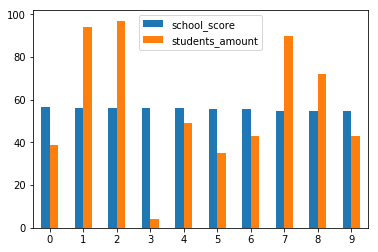

In [ ]:
prepare_show_graph('20061.csv')

0,  inst alberto merani
1,  lic navarra
2,  lic  de cervantes padres agustinos
3,  col calasanz
4,  lic campo david
5,  col  san bonifacio de las lanzas
6,  aspaen gimnasio la fragua
7,  cent. de enseñanza precoz  nuevo mundo
8,  gimn de los cerros
9,  col refous


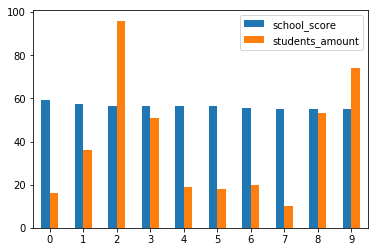

In [ ]:
prepare_show_graph('20062.csv')

### 2007

0,  col los nogales
1,  col. fund.   biling . de valledupar
2,  col san carlos
3,  col san jorge de inglaterra
4,  gimn vermont
5,  col santa francisca romana
6,  gimn la montaña
7,  lic frances louis pasteur
8,  col la quinta del puente
9,  col lic frances de pereira


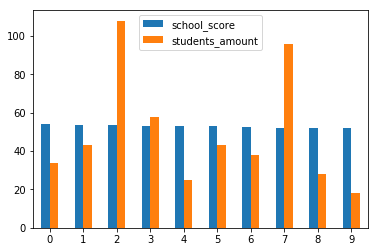

In [ ]:
prepare_show_graph('20071.csv')

0,  inst alberto merani
1,  lic navarra
2,  lic  de cervantes padres agustinos
3,  col refous
4,  aspaen gimnasio cantillana - sede principal
5,  cent. de enseñanza precoz  nuevo mundo
6,  colegio seminario corazonista
7,  col corazonista hh del sagrado corazon
8,  lic campo david
9,  col  san bonifacio de las lanzas


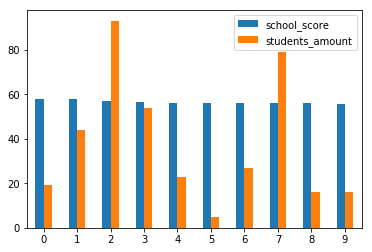

In [ ]:
prepare_show_graph('20072.csv')

### 2008

0,  gimn vermont
1,  col san carlos
2,  col los nogales
3,  colegio marymount - sede principal
4,  col la quinta del puente
5,  col san jorge de inglaterra
6,  col santa francisca romana
7,  col italiano leonardo da vinci
8,  gimn de los cerros
9,  gimn la montaña


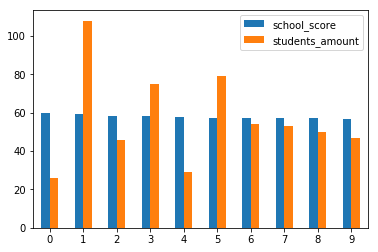

In [ ]:
prepare_show_graph('20081.csv')

0,  lic campo david
1,  col calasanz
2,  inst alberto merani
3,  lic navarra
4,  glenn doman escuela precoz
5,  lic  de cervantes padres agustinos
6,  aspaen gimnasio cantillana - sede principal
7,  col reuven feuerstein
8,  lic juan ramon jimenez
9,  colegio seminario corazonista


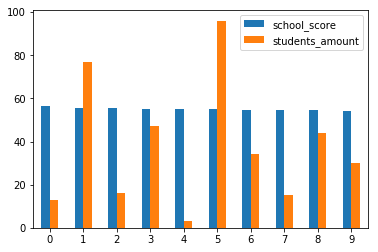

In [ ]:
prepare_show_graph('20082.csv')

### 2009

0,  col la quinta del puente
1,  gimn vermont
2,  col san jorge de inglaterra
3,  colegio bilingue diana oese
4,  col san carlos
5,  gimn la montaña
6,  col santa francisca romana
7,  col los nogales
8,  lic frances louis pasteur
9,  col san mateo apostol


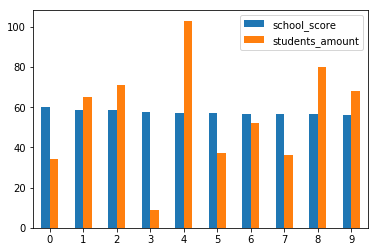

In [ ]:
prepare_show_graph('20091.csv')

0,  inst alberto merani
1,  lic campo david
2,  colegio seminario corazonista
3,  col  san pedro claver
4,  col refous
5,  aspaen gimnasio cantillana - sede principal
6,  col el rosario
7,  col nuevo colombo americano
8,  lic  de cervantes padres agustinos
9,  fund educ. inst experimental jose celestino mutis


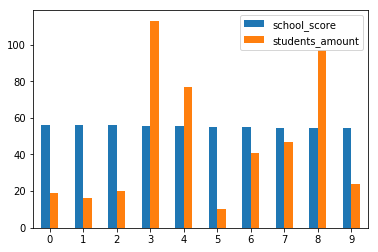

In [ ]:
prepare_show_graph('20092.csv')

### 2010

0,  col santa francisca romana
1,  col. internacional de educación integral - ciedi ltda - sede principal
2,  col la quinta del puente
3,  col san jorge de inglaterra
4,  gimn vermont
5,  col la colina
6,  col calatrava - sede principal
7,  col san carlos
8,  col campoalegre ltda - sede principal
9,  colegio real (royal school) - sede principal


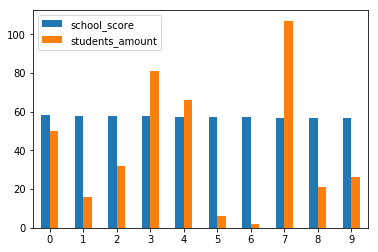

In [ ]:
prepare_show_graph('20101.csv')

0,  inst alberto merani
1,  fund educ. inst experimental jose celestino mutis
2,  lic campo david
3,  col anglo americano
4,  inst musical diego echavarria
5,  aspaen gimnasio cantillana - sede principal
6,  col  san bonifacio de las lanzas
7,  col  san pedro claver
8,  gimnasio colombo britanico - sede principal
9,  col nuevo colombo americano


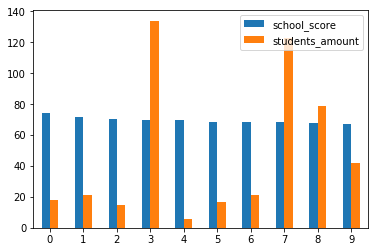

In [ ]:
prepare_show_graph('20102.csv')

### 2011

0,  col david eisenhower
1,  col la quinta del puente
2,  colegio bilingue diana oese
3,  col santa francisca romana
4,  col los nogales
5,  col. internacional de educación integral - ciedi ltda - sede principal
6,  gimn. cartagena de indias
7,  col san jorge de inglaterra
8,  gimn vermont
9,  col abraham lincoln


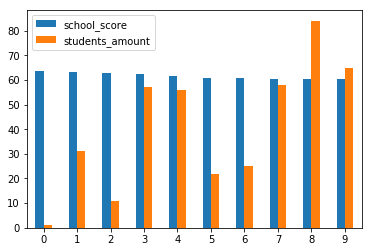

In [ ]:
prepare_show_graph('20111.csv')

0,  glenn doman escuela precoz
1,  liceo cooperativo campestre
2,  gimnasio colombo britanico - bilingüe internacional
3,  col anglo americano
4,  inst alberto merani
5,  col de la compania de maria
6,  col nuevo colombo americano
7,  fundacion educativa instituto experimental del atlantico jose celestino mutis
8,  lic navarra
9,  colegio corazonista


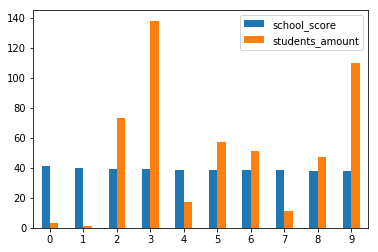

In [ ]:
prepare_show_graph('20112.csv')

### 2012

0,  col la quinta del puente
1,  col los nogales
2,  col san jorge de inglaterra
3,  colegio bilingue diana oese
4,  colegio hispanoamericano
5,  colegio colombo británico
6,  colegio freinet
7,  corporacion educativa colegio italiano galileo galilei
8,  gimn vermont
9,  col nuevo cambridge


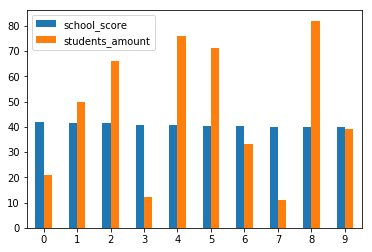

In [ ]:
prepare_show_graph('20121.csv')

0,  inst alberto merani
1,  col  san bonifacio de las lanzas
2,  col de la compania de maria
3,  colegio seminario corazonista
4,  cambridge school (gimn biling plaza sesamo)
5,  lic campo david
6,  col anglo americano
7,  col nuevo colombo americano
8,  colegio corazonista
9,  col  san pedro claver


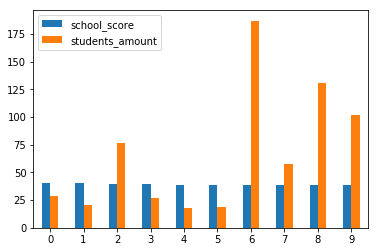

In [ ]:
prepare_show_graph('20122.csv')

### 2013

0,  colegio bilingue diana oese
1,  gimn vermont
2,  colegio leonardo da vinci
3,  col nuevo cambridge
4,  col la quinta del puente
5,  col san jorge de inglaterra
6,  col los nogales
7,  colegio internacional de educacion integral - ciedi
8,  col biling buckingham
9,  gimnasio campestre san rafael


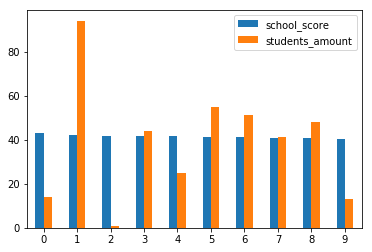

In [ ]:
prepare_show_graph('20131.csv')

0,  col nueva granada
1,  inst alberto merani
2,  colegio seminario corazonista
3,  col montessori
4,  col nuevo colombo americano
5,  gimnasio colombo britanico - bilingüe internacional
6,  lic navarra
7,  col saint andrews
8,  colegio corazonista
9,  col anglo americano


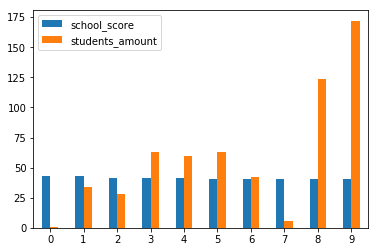

In [ ]:
prepare_show_graph('20132.csv')

### 2014

0,  col los nogales
1,  col la quinta del puente
2,  col san mateo apostol
3,  col  montessori british school
4,  col san carlos
5,  gimn vermont
6,  aspaen liceo tacurí
7,  aspaen gimnasio cartagena de indias
8,  col san jorge de inglaterra
9,  col fundacion lic ingles


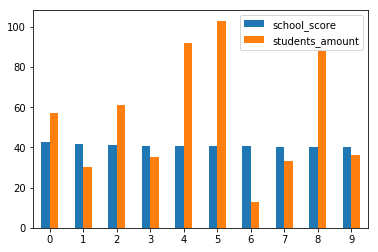

In [ ]:
prepare_show_graph('20141.csv')

0,  colombo britanico - bilingüe internacional
1,  cambridge school (gimn biling plaza sesamo)
2,  lic navarra
3,  inst alberto merani
4,  col nuevo colombo americano
5,  lic campo david
6,  col anglo americano
7,  col refous
8,  colegio corazonista
9,  col el rosario


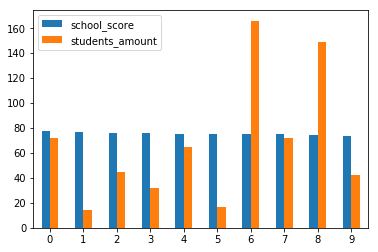

In [ ]:
prepare_show_graph('20142.csv')

### 2015

0,  colegio bilingue diana oese
1,  col los nogales
2,  col la quinta del puente
3,  col la colina
4,  col san carlos
5,  col san jorge de inglaterra
6,  colegio philadelphia internacional
7,  col santa francisca romana
8,  col campoalegre ltda
9,  col san mateo apostol


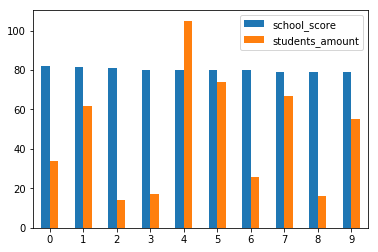

In [ ]:
prepare_show_graph('20151.csv')

0,  lic campo david
1,  col nuevo colombo americano
2,  lic navarra
3,  inst alberto merani
4,  cambridge school (gimn biling plaza sesamo)
5,  col anglo americano
6,  col internacional de bogota
7,  col el pinar
8,  colombo britanico - bilingüe internacional
9,  fund col uis


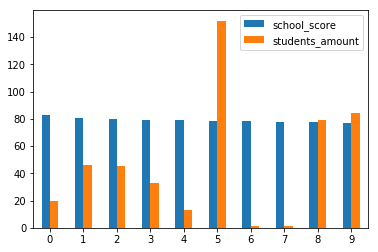

In [ ]:
prepare_show_graph('20152.csv')

### 2016

0,  colegio bilingue diana oese
1,  colegio leonardo da vinci
2,  col los nogales
3,  col nuevo cambridge
4,  col san jorge de inglaterra
5,  col san carlos
6,  gimn vermont
7,  col la quinta del puente
8,  lic campestre de pereira
9,  col campoalegre ltda


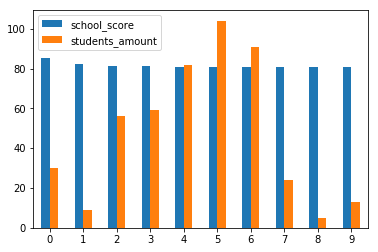

In [ ]:
prepare_show_graph('20161.csv')

0,  lic campo david
1,  col nuevo colombo americano
2,  col nueva inglaterra
3,  nuevo colegio del prado
4,  colombo britanico - bilingüe internacional
5,  col anglo americano
6,  lic navarra
7,  gimnasio el hontanar
8,  inst alberto merani
9,  col  san bonifacio de las lanzas


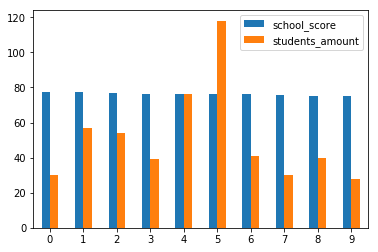

In [ ]:
prepare_show_graph('20162.csv')

### 2017

0,  col nuevo cambridge
1,  col la quinta del puente
2,  colegio bilingue diana oese
3,  col la colina
4,  colegio philadelphia internacional
5,  gimn vermont
6,  col santa francisca romana
7,  col los nogales
8,  col san carlos
9,  col san jorge de inglaterra


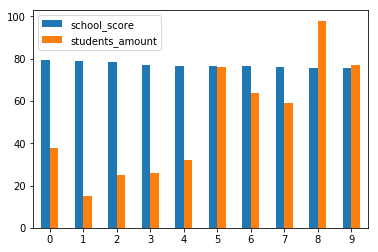

In [ ]:
prepare_show_graph('20171.csv')

0,  lic campo david
1,  gimnasio colombo britanico - bilingüe internacional
2,  gimnasio el hontanar
3,  col anglo americano
4,  col nuevo colombo americano
5,  nuevo colegio del prado
6,  lic navarra
7,  col  san bonifacio de las lanzas
8,  inst alberto merani
9,  col  anglocanadiense de neiva


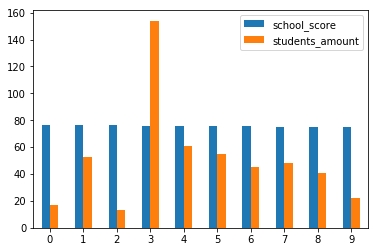

In [ ]:
prepare_show_graph('20172.csv')

### 2018

0,  col la quinta del puente
1,  col nuevo cambridge
2,  colegio bilingue diana oese
3,  colegio harvard
4,  col san jorge de inglaterra
5,  gimn alessandro volta
6,  col san carlos
7,  colegio philadelphia internacional
8,  col los nogales
9,  gimn vermont


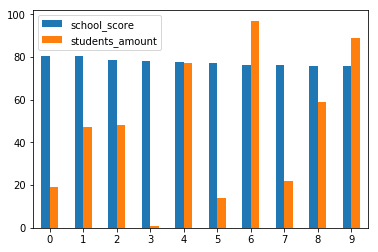

In [ ]:
prepare_show_graph('20181.csv')

0,  col heraldos del evangelio
1,  lic campo david
2,  cambridge school (gimn biling plaza sesamo)
3,  col nuevo colombo americano
4,  inst alberto merani
5,  gimnasio colombo britanico - bilingüe internacional
6,  col anglo americano
7,  aspaen gimnasio cantillana
8,  lic navarra
9,  col ingles


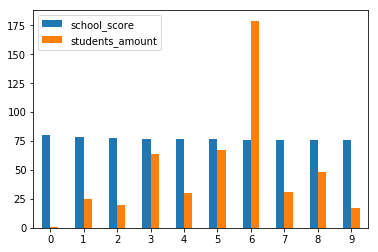

In [ ]:
prepare_show_graph('20182.csv')

## Solución punto 3
Cada estudiante puede presentar su prueba vinculado a un colegio o como prueba individual. Calcular el número de estudiantes para cada año de cada grupo.

### Metadatos del punto 3

In [ ]:
metadata_2006_2011 = {
    'files': ['20061',
              '20062',
              '20071',
              '20072',
              '20081',
              '20082',
              '20091',
              '20092',
              '20101',
              '20102',
              '20111'],
    'column': 'estu_estudiante'
}

metadata_2011_20182 = {
    'files': ['20112',
              '20121',
              '20122',
              '20131',
              '20132',
              '20141',
              '20142',
              '20151',
              '20152',
              '20161',
              '20162',
              '20171',
              '20172',
              '20181',
              '20182',
              '20191'],
    'column': 'ESTU_ESTUDIANTE'
}

### Funciones punto 3

In [ ]:
def read_dataframe(path_file):
  return spark.read.load(path_file, format='csv', sep='¬', inferSchema='true', header='true')

In [ ]:
def get_dataframe_columns(dataframe, columns):
  return dataframe.select(columns)

In [ ]:
def count_value(dataframe, column, value):
  return dataframe.filter(dataframe[column] == value).count()

In [ ]:
def get_students_type(files, column_filter, student, individual):
  columns = ['period', 'students', 'individual']
  values = []

  for file in files:
    path_file = f'{target_sb_ulr}/{file}.txt'

    dataframe = read_dataframe(path_file)
    dataframe = get_dataframe_columns(dataframe, column_filter)

    students_counter = count_value(dataframe, column_filter, student)
    individual_counter = count_value(dataframe, column_filter, individual)

    row_values = (file, students_counter, individual_counter)
    values.append(row_values)

  return spark.createDataFrame(values, columns)

### Resultados

In [14]:
files1 = metadata_2006_2011['files']
column1 = metadata_2006_2011['column']

files2 = metadata_2011_20182['files']
column2 = metadata_2011_20182['column']
target_file = f'{target_inscription_url}/inscriptions.csv'

dataframe1 = get_students_type(files1, column1, 0, 1)
dataframe2 = get_students_type(files2, column2, 'ESTUDIANTE', 'INDIVIDUAL')

total_dataframe = dataframe1.union(dataframe2)
total_dataframe.toPandas().to_csv(target_file)

total_dataframe.show(5)

+------+--------+----------+
|period|students|individual|
+------+--------+----------+
| 20061|       0|     61070|
| 20062|       0|    410808|
| 20071|       0|     67703|
| 20072|       0|    434686|
| 20081|       0|     68897|
+------+--------+----------+
only showing top 5 rows

